# Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
#from sklearn.decomposition import PCA

## Load data

In [2]:
path = "Temp/"

x_data = np.load(path+"x_data.npy")
y_data = np.load(path+"y_data.npy")

features = ["DATE", "COUNT", "ACT-COUNT", "WEIGHT", "STREN", "TM", "LL", "CPI", "WPI", "L", "W"]

## Find Covariance Matrix

In [3]:
mean_vec = np.mean(x_data, axis=0)
x_c = x_data - mean_vec

cov_mat = (x_data - mean_vec).T.dot((x_data - mean_vec)) / (x_data.shape[0]-1)

## Find eigenvectors and eigenvalues

In [4]:
cov_df = pd.DataFrame(cov_mat, columns=features)
cov_df.insert(0, "Features", features)
print(cov_df)

     Features          DATE         COUNT     ACT-COUNT        WEIGHT  \
0        DATE  8.517637e-02 -1.390476e-02 -1.784355e-17 -1.363757e-17   
1       COUNT -1.390476e-02  1.000018e+00  3.670672e-17 -1.705333e-16   
2   ACT-COUNT -1.784355e-17  3.670672e-17  1.000018e+00  1.000018e+00   
3      WEIGHT -1.363757e-17 -1.705333e-16  1.000018e+00  1.000018e+00   
4       STREN  1.078807e-02  1.045683e-01 -8.523479e-18 -9.861745e-18   
5          TM  1.563812e-02  6.726321e-03  2.580941e-18  1.414738e-17   
6          LL -3.798061e-02  8.386437e-01  4.053034e-17 -7.672725e-17   
7         CPI  3.048946e-04 -9.773631e-01 -2.549078e-19  2.396133e-17   
8         WPI -1.133426e-02 -8.930018e-02 -1.053486e-17  1.499973e-17   
9           L  1.064189e-02  1.083306e-01 -8.591747e-16 -8.940891e-16   
10          W  1.093050e-02  1.007826e-01  1.754722e-15  1.753670e-15   

           STREN            TM            LL           CPI           WPI  \
0   1.078807e-02  1.563812e-02 -3.798061e-02  3

In [5]:

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  3.61479181e-03   1.20218683e-02  -1.79934696e-02   2.37753294e-01
    9.59885212e-01   1.46994578e-01   2.40397030e-17   2.23099705e-03
    1.03555419e-04  -1.95574285e-08  -4.55565630e-13]
 [  1.13793752e-01  -5.78861462e-01   4.92690524e-02   3.40443923e-01
   -1.84773310e-01   7.06674001e-01  -5.35684569e-16  -1.05624207e-02
   -1.42719717e-05   4.96487143e-07   1.00520607e-11]
 [  2.71274901e-16   2.34007690e-16   2.16940596e-16  -6.43119444e-17
   -7.21007636e-17   4.15292652e-15  -7.07106781e-01   1.00836783e-13
    1.84435393e-10   7.72365027e-06  -7.07106781e-01]
 [  2.15787915e-16   2.67652128e-16   9.43221045e-17   1.85774253e-16
    6.21253607e-17  -4.05925168e-15  -7.07106781e-01  -1.00342676e-13
   -1.84433503e-10  -7.72365027e-06   7.07106781e-01]
 [  4.85190395e-01   7.62130411e-02  -9.28760723e-02  -5.53186821e-03
   -3.23074309e-03  -3.39685809e-03   1.43762515e-16   2.68413116e-01
   -2.35722666e-01  -7.88981961e-01  -1.59670856e-05]
 [ -1.71247716e-

## Explained variance of each eigenvector 

In [6]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

[41.116894285080299, 26.919381083120818, 19.831089018500776, 9.1723390144078092, 2.0059917957292352, 0.7816960928679072, 0.16321167974576797, 0.0093959167518995728, 1.1137780120513422e-06, 1.7457249289841604e-11, 1.8559556974456103e-14]


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


<BarContainer object of 11 artists>

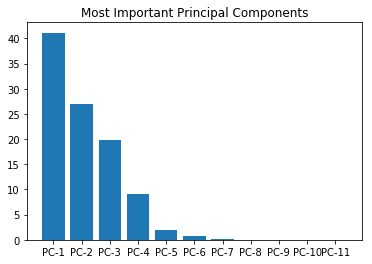

In [8]:
x = ["PC-{}".format(i) for i in range(1, len(eig_vals)+1)]
plt.title("Most Important Principal Components")
plt.bar(x, var_exp)

In [9]:
plt.savefig("PCA.png")

<Figure size 432x288 with 0 Axes>

## Contribution of each feature to every principal component

In [20]:
loadings = eig_vecs.T/ np.sqrt(eig_vals.T)

loadings_df = pd.DataFrame(loadings, columns=x)
loadings_df.insert(0, "", features)


In [33]:
for column in loadings_df.columns:
    if column!="":
        print("Major contributor to {0} is {1}".format(column, loadings_df.iloc[loadings_df[column].idxmax(),0]))

Major contributor to PC-1 is STREN
Major contributor to PC-2 is TM
Major contributor to PC-3 is L
Major contributor to PC-4 is W
Major contributor to PC-5 is DATE
Major contributor to PC-6 is WEIGHT
Major contributor to PC-7 is STREN
Major contributor to PC-8 is TM
Major contributor to PC-9 is CPI
Major contributor to PC-10 is WPI
Major contributor to PC-11 is L


This is clear from the value of the loadings for every Principal Component. Note that in the first column, "STREN" has the maximum value

In [21]:
print(loadings_df.iloc[:,:7])

                       PC-1          PC-2          PC-3          PC-4  \
0        DATE  1.775119e-03  6.906218e-02  2.820486e-16  4.797522e-16   
1       COUNT  5.903590e-03 -3.513148e-01  2.433013e-16  5.950597e-16   
2   ACT-COUNT -8.836070e-03  2.990171e-02  2.255564e-16  2.097023e-16   
3      WEIGHT  1.167537e-01  2.066177e-01 -6.686610e-17  4.130240e-16   
4       STREN  4.713717e-01 -1.121401e-01 -7.496425e-17  1.381207e-16   
5          TM  7.218477e-02  4.288851e-01  4.317860e-15 -9.024763e-15   
6          LL  1.180520e-17 -3.251105e-16 -7.351896e-01 -1.572081e+00   
7         CPI  1.095578e-03 -6.410403e-03  1.048415e-13 -2.230876e-13   
8         WPI  5.085306e-05 -8.661754e-06  1.917603e-10 -4.100432e-10   
9           L -9.604085e-09  3.013213e-07  8.030396e-06 -1.717167e-05   
10          W -2.237150e-13  6.100662e-12 -7.351896e-01  1.572081e+00   

            PC-5          PC-6  
0   1.728015e+00 -1.334761e+00  
1   2.714343e-01 -5.902436e-01  
2  -3.307800e-01 -7.4977

## Descending order of contribution for each principal component

In [57]:
data = []

for column in loadings_df.columns[1:]:
    data.append(loadings_df.sort_values(by=[column], ascending=False).iloc[:,0].values)

df = pd.DataFrame(np.asarray(data).T, columns=loadings_df.columns[1:])
print(df)

         PC-1       PC-2       PC-3       PC-4       PC-5       PC-6  \
0       STREN         TM          L          W       DATE     WEIGHT   
1      WEIGHT     WEIGHT        WPI      COUNT        CPI        CPI   
2          TM       DATE        CPI       DATE      COUNT        WPI   
3       COUNT  ACT-COUNT         TM     WEIGHT         LL         LL   
4        DATE          L       DATE  ACT-COUNT          W          W   
5         CPI          W      COUNT      STREN      STREN          L   
6         WPI         LL  ACT-COUNT         TM         TM      STREN   
7          LL        WPI     WEIGHT        CPI     WEIGHT         TM   
8           W        CPI      STREN        WPI  ACT-COUNT      COUNT   
9           L      STREN          W          L        WPI       DATE   
10  ACT-COUNT      COUNT         LL         LL          L  ACT-COUNT   

         PC-7       PC-8       PC-9      PC-10      PC-11  
0       STREN         TM        CPI        WPI          L  
1        DATE  

In [42]:
data = pd.DataFrame(x_data, columns=features)
data.head()

,DATE,COUNT,ACT-COUNT,WEIGHT,STREN,TM,LL,CPI,WPI,L,W
0,0.0,1.124259,-1.414214,-1.414214,-0.975976,0.334026,1.541182,-1.097852,0.975999,-0.975503,-0.976264
1,0.0,1.124259,-1.414214,-1.414214,-1.940037,0.639074,1.950932,-1.096988,1.981780,-1.928919,-1.950891
2,0.0,1.124259,-1.414214,-1.414214,1.953164,-0.542989,1.654835,-1.100370,-1.915625,1.961819,1.944216
3,0.0,1.124259,-1.414214,-1.414214,-0.975976,0.334026,2.118261,-1.097852,0.975999,-0.975503,-0.976264
4,0.0,1.124259,-1.414214,-1.414214,1.295589,-0.352333,2.157441,-1.099818,-1.287020,1.297139,1.293802
